## Example usage of the Vision Automatic Band Gap Extractor package

#### The input hyperspectral datacube .bil and .hdr files segmented and then band gaps are automatically calculated across all segmented samples.

In [1]:
# imports for band gap extraction
import vision
import extractor
import os
import requests
# imports for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#### Download the data and define crop parameters to segment the hyperspectral datacube

Example **.bil** and **.hdr** hypercubes of the printed FA$_{1-x}$MA$_x$PbI$_3$ semiconductors from this study will be made publicly available.

In [2]:
# download data from database
def download(url, filename, fn=None):
    if fn is None:
        fn = url.split('/')[-1]
        r = requests.get(url)
    if r.status_code == 200:
        open('data/'+filename, 'wb').write(r.content)
        print("{} downloaded: {:.3f} MB".format('data/'+filename, len(r.content)/1024000.))
    else:
        print("url not found:", url)
download(url='https://osf.io/download/kbhjz',filename='MAFAPbI.hdr')
download(url='https://osf.io/download/9gsv6',filename='MAFAPbI.bil')
bil = 'data/MAFAPbI.bil'
hdr = 'data/MAFAPbI.hdr'
rotate_crop_params = {'theta': -0.5, 'x1': 45, 'x2': 830, 'y1': 120, 'y2': 550} # USER DEFINED ROTATE/CROP PARAMETERS

data/MAFAPbI.hdr downloaded: 0.003 MB
data/MAFAPbI.bil downloaded: 316.406 MB


#### Run the vision segmentation process and extract the band gaps

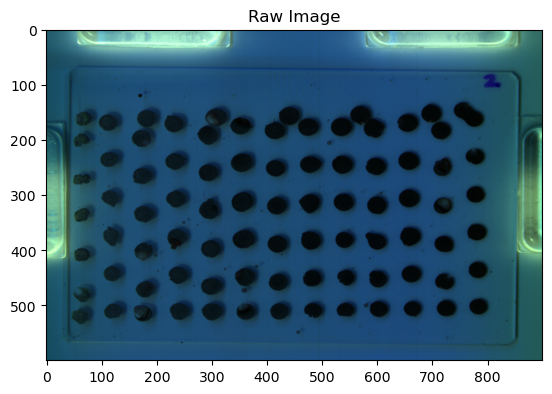

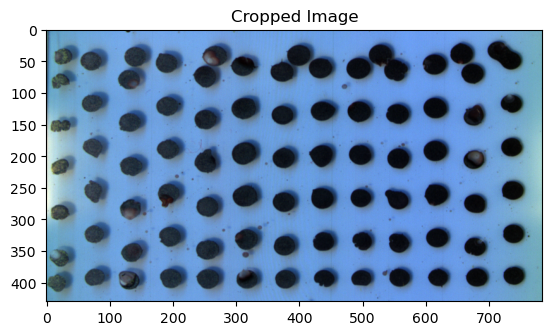

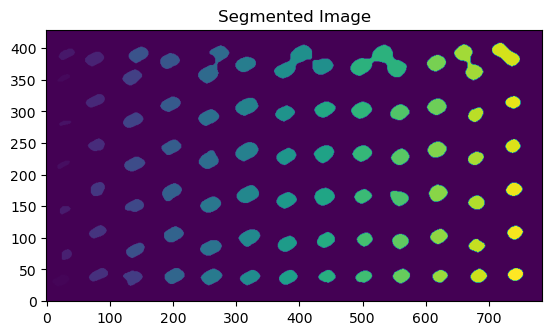

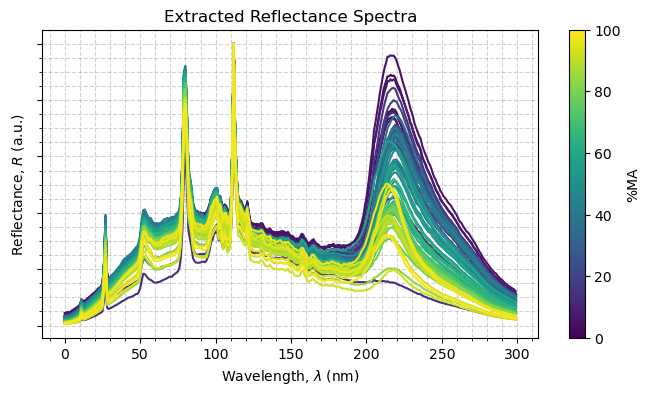

,wavelength,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,381.51,17.595570,17.962498,24.633310,22.113138,17.442635,27.925869,19.236355,17.333693,19.761435,...,20.799763,17.999947,17.111959,15.538270,16.354631,22.684658,18.925858,22.513533,19.235399,16.805384
1,383.52,18.867434,20.174644,27.116169,24.566124,18.877449,28.656126,20.237236,18.690006,21.001442,...,21.709728,18.082653,18.246990,16.564594,17.155848,23.271570,19.394133,23.006323,20.259092,17.650587
2,385.52,20.535114,21.062189,28.540672,26.137455,19.845596,30.029600,21.097845,20.346783,23.034620,...,22.394848,19.300446,19.187819,17.593452,18.128029,24.428318,20.023014,23.119051,21.087536,18.654072
3,387.53,21.221504,21.762791,30.161011,27.345427,20.678959,31.569124,21.020508,20.840815,23.908106,...,21.949366,19.674814,18.782694,17.355276,16.926291,23.520294,19.825470,23.684591,20.094675,17.604931
4,389.54,25.789948,25.656513,33.478935,30.773560,25.637226,34.590950,23.482691,25.412275,27.743866,...,23.942810,21.682499,20.567886,19.590773,19.861330,25.401346,21.804731,25.170624,23.236416,21.143951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1010.14,73.489182,74.787819,91.635017,85.078705,76.491943,93.147858,71.782043,78.067970,80.170822,...,66.986694,66.139420,64.861588,64.275826,68.814354,70.054413,65.412010,69.161842,65.284981,62.925713
296,1012.40,72.261696,72.524849,89.992935,82.851059,74.582565,89.958992,70.465118,76.375038,77.644264,...,64.419830,63.592545,62.635754,62.852287,66.672455,67.900688,63.156551,65.975914,62.885353,61.588310
297,1014.66,71.460365,72.498985,86.935570,79.970490,72.966949,87.835083,69.614365,74.777740,75.017067,...,64.275963,62.355701,61.468716,62.342781,65.311554,66.273590,61.213982,65.552597,61.006001,59.976627
298,1016.92,67.212494,69.553986,83.949738,77.620316,68.553360,83.044106,66.115227,70.400894,72.254036,...,61.526932,59.814266,58.160141,58.455410,62.296265,64.539314,58.930115,62.762775,59.721733,56.954803


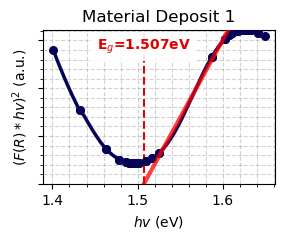

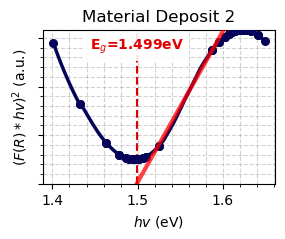

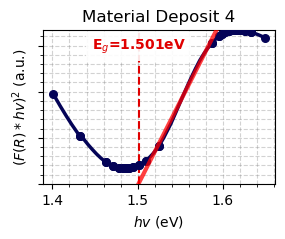

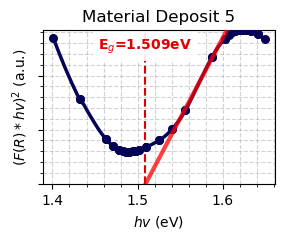

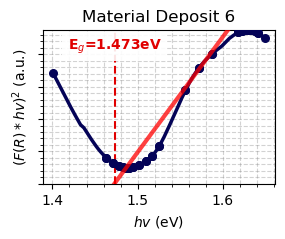

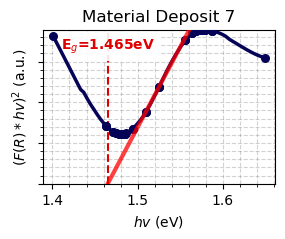

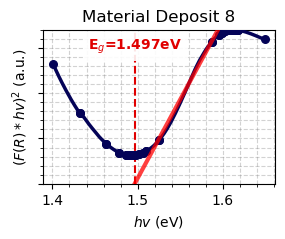

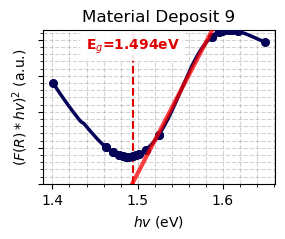

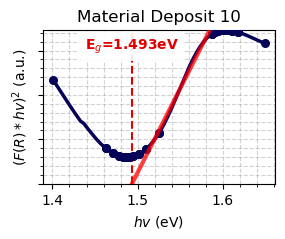

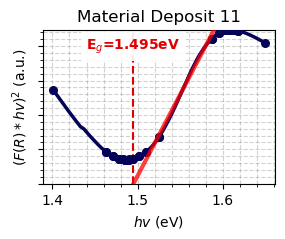

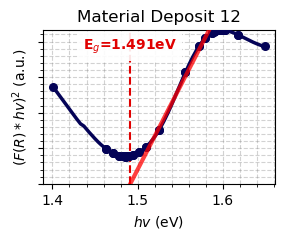

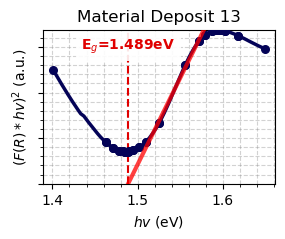

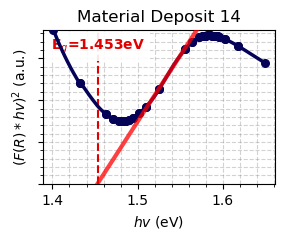

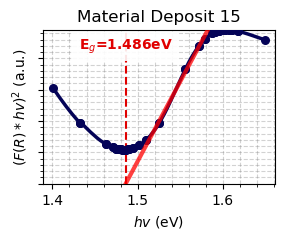

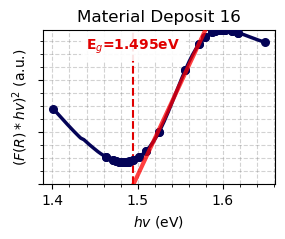

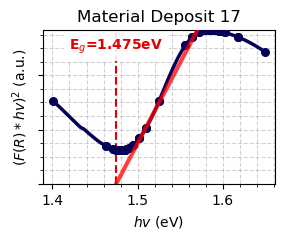

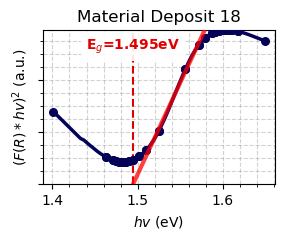

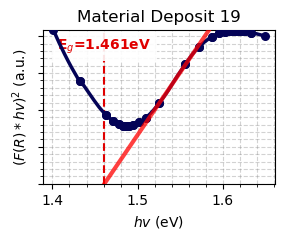

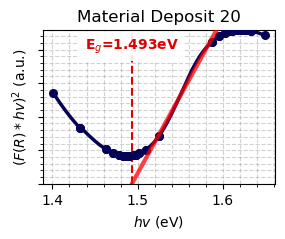

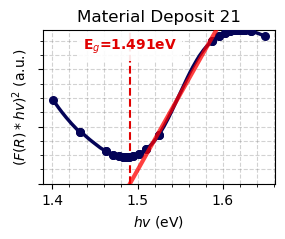

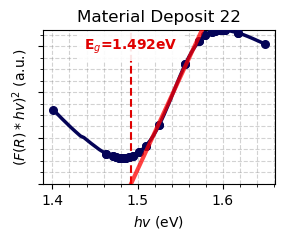

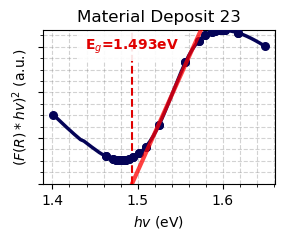

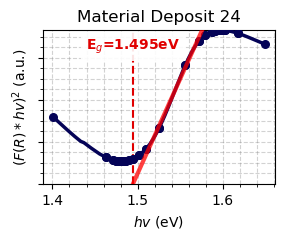

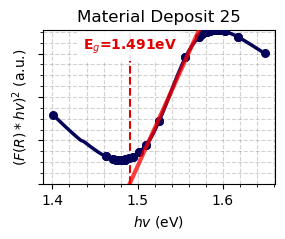

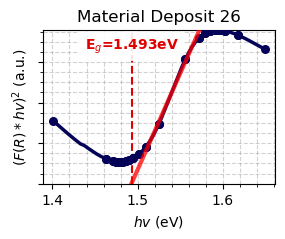

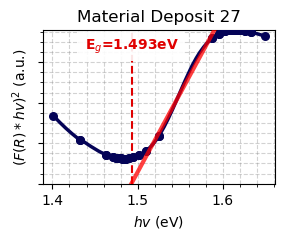

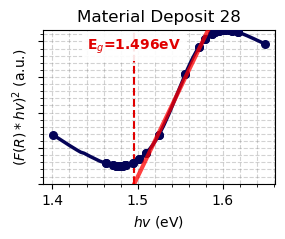

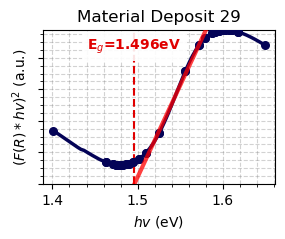

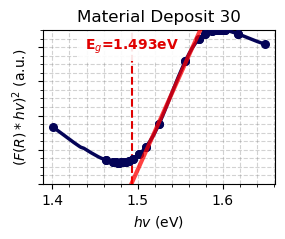

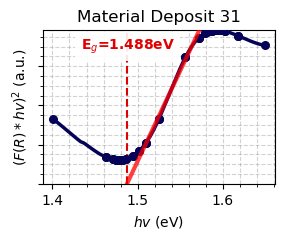

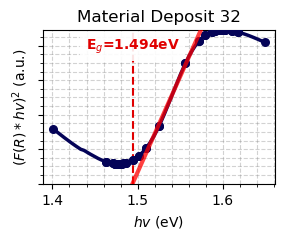

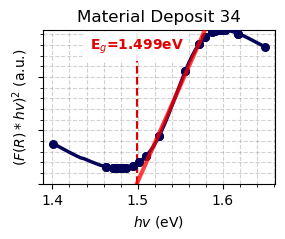

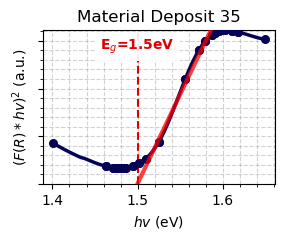

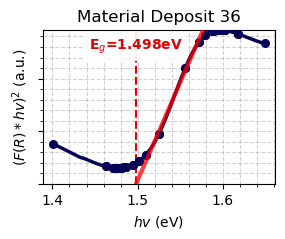

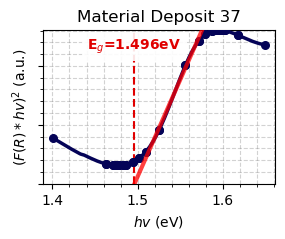

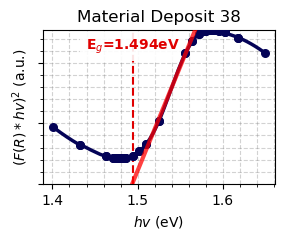

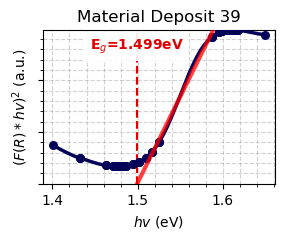

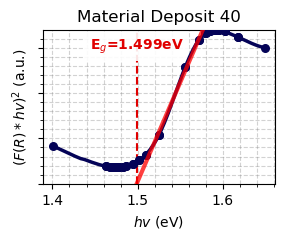

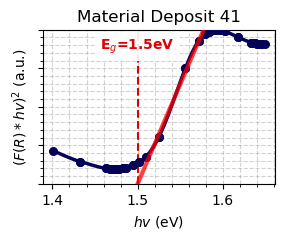

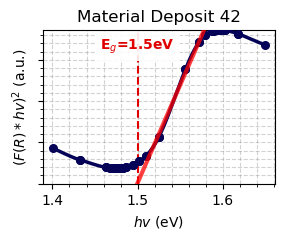

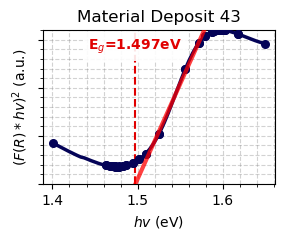

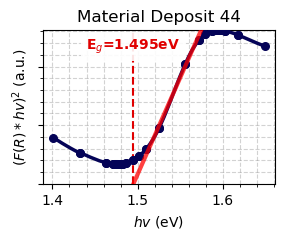

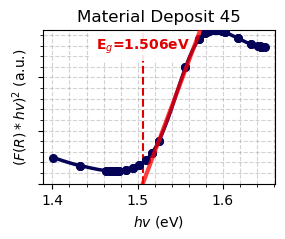

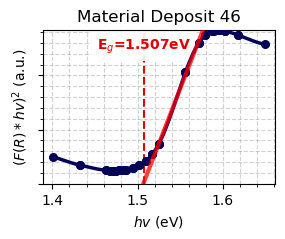

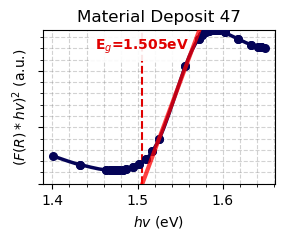

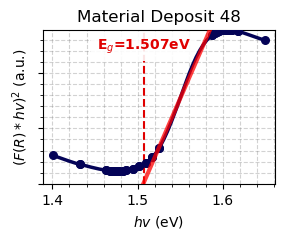

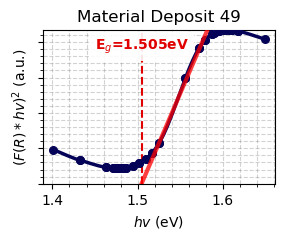

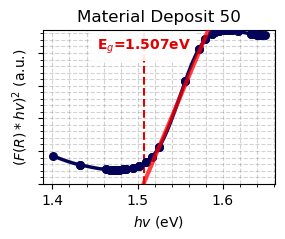

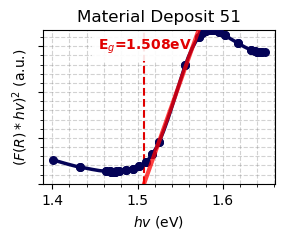

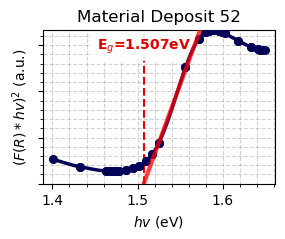

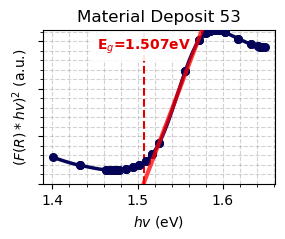

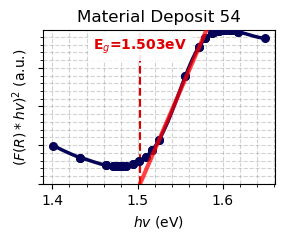

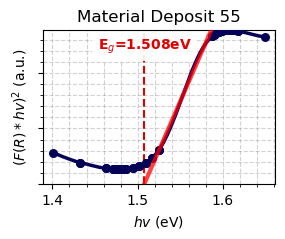

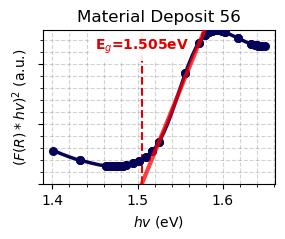

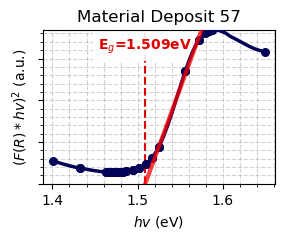

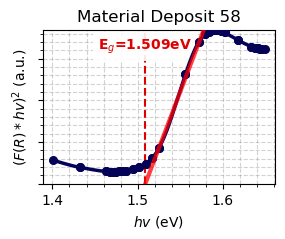

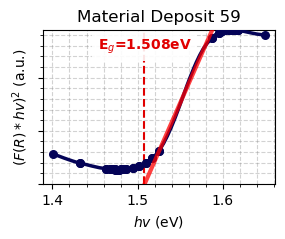

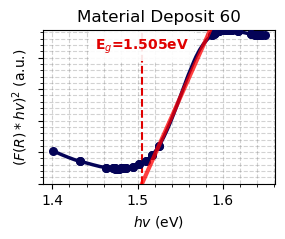

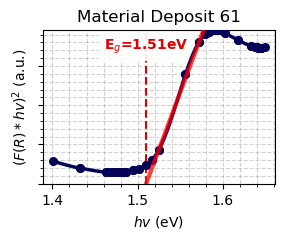

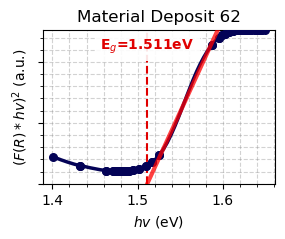

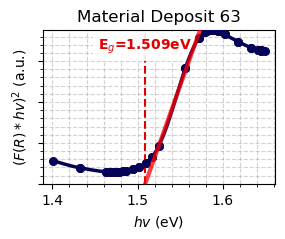

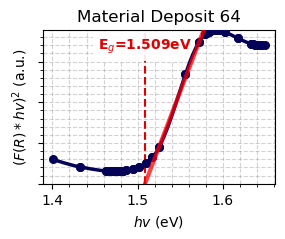

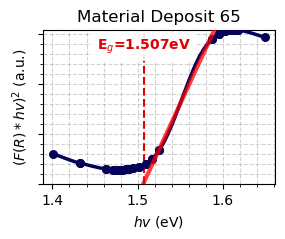

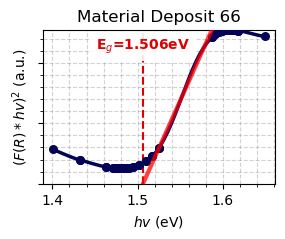

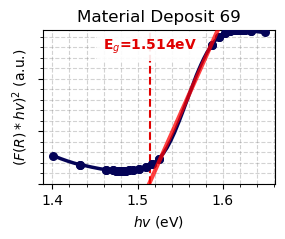

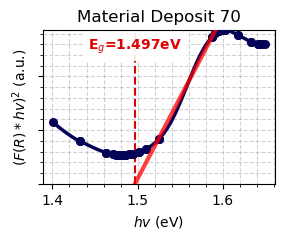

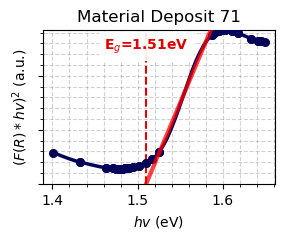

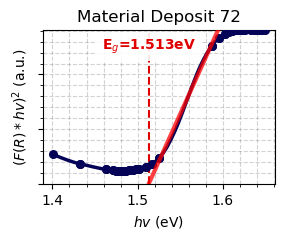

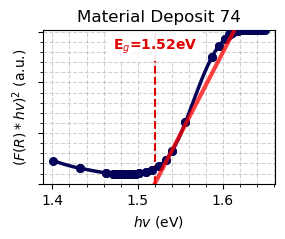

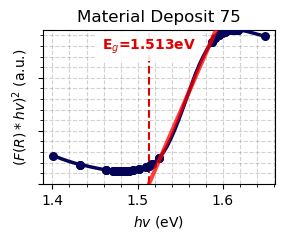

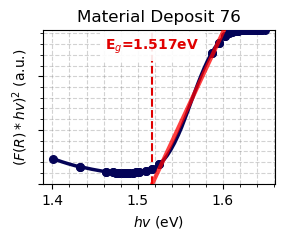

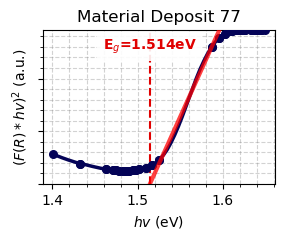

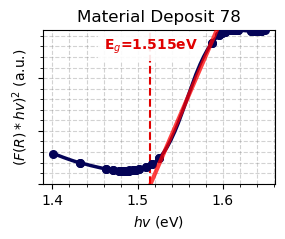

,1,2,3,4,5,6,7,8,9,10,...,69,70,71,72,73,74,75,76,77,78
bandgap0,1.507,1.499,NaN,1.501,1.509,1.473,1.465,1.497,1.494,1.493,...,1.514,1.497,1.51,1.513,NaN,1.52,1.513,1.517,1.514,1.515
bandgap1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = vision.segmentation(bil=bil, hdr=hdr, rotate_crop_params=rotate_crop_params)
display(data)
eg = extractor.autoextract(data=data, savepath=os.getcwd()+'\\example-output', verbose=True)
display(eg)

#### Visualize the extracted band gaps together

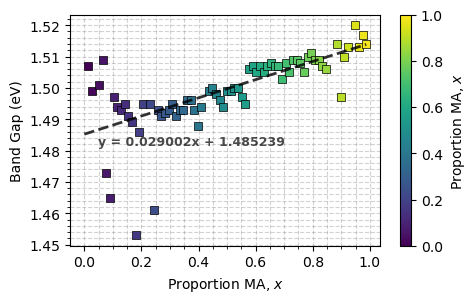

In [4]:
# plot the extracted band gaps
egs = eg.iloc[0,:]
idx_min = egs.index.min()
idx_max = egs.index.max()
colormap = mpl.cm.get_cmap('viridis')
fig,ax=plt.subplots(figsize=(5,3))
for n in range(idx_min, idx_max):
    idx_norm = (n-idx_min)/(idx_max-idx_min)
    rgba = colormap(idx_norm)
    ax.scatter(n/idx_max, egs[n], marker='s', color=rgba,zorder=10,ec='k',linewidth=0.5)
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle='--', alpha=0.35,zorder=0)
ax.grid(which='major', color='gray', linestyle='--', alpha=0.35,zorder=0)
plt.ylabel('Band Gap (eV)')
plt.xlabel(r'Proportion MA, $x$')
fig.colorbar(mpl.cm.ScalarMappable(norm = mpl.colors.Normalize(vmin=0, vmax=1), cmap=mpl.cm.viridis), label=r'Proportion MA, $x$')

x = (np.arange(0,idx_max,1)/idx_max)
y = np.array(egs)

model_eg = LinearRegression().fit(x[~np.isnan(y)].reshape(-1, 1), y[~np.isnan(y)].reshape(-1, 1))
regress = (x*model_eg.coef_+model_eg.intercept_).reshape(-1)
plt.plot(x, regress,c='k',ls='--',lw=2,alpha=0.8,zorder=15)
plt.text(x[-1]*0.05,y[~np.isnan(y)][-1]*0.978,f'y = {np.round(model_eg.coef_,6).item()}x + {np.round(model_eg.intercept_,6).item()}',weight='bold',alpha=0.7,fontsize=9)
plt.show()